# Methods Optimisation Realisation

## Methods of first order

### SimpleGradientDescent

First task

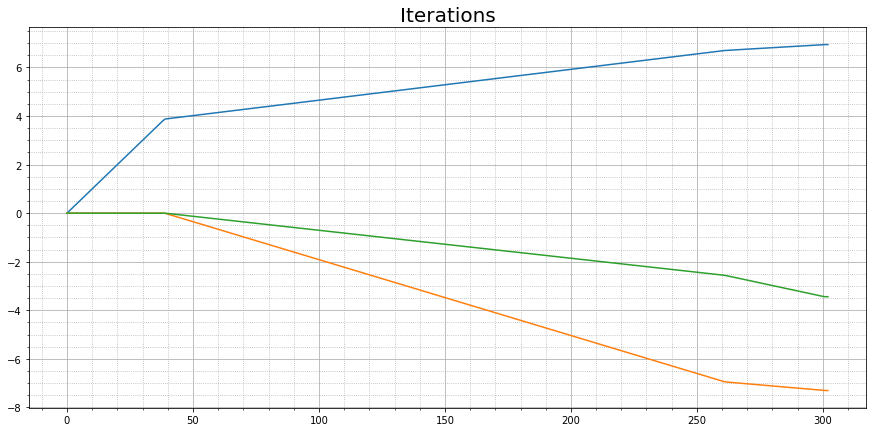

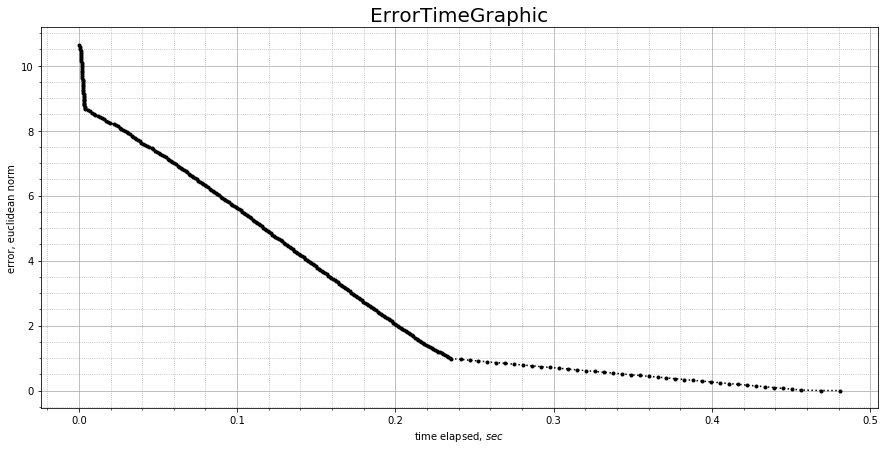

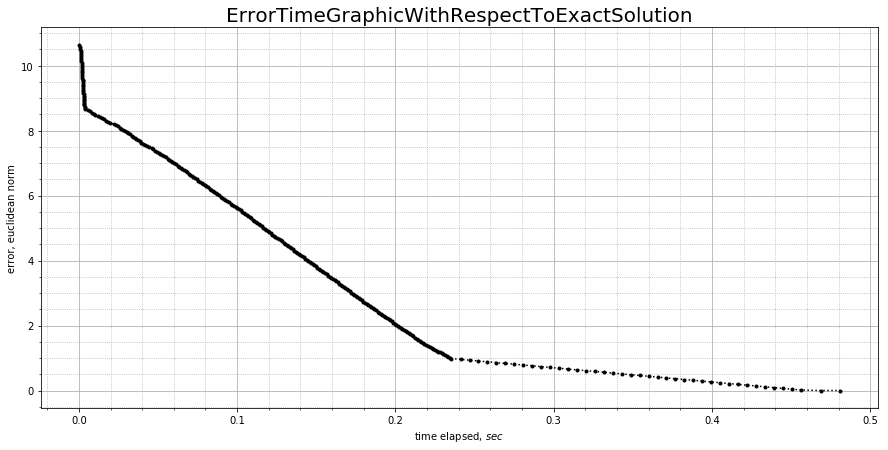

In [2]:
import numpy as np
from opt_project import task_1
from opt_project.methods.first_order_methods import simple_gd
from opt_project.methods.first_order_methods.step_sizes import ConstantStepSize
from opt_project.stop_criterias import ydiff_stop_crit

a = np.array([1., 0., 0.])
b = np.array([1,])
F = np.array([
    [76.3402909013, 27.3236913435, 10.0695823542],
    [-27.5962812192, -62.9012921655, 17.7348207564],
    [-26.2012001069, 19.1239055741, 58.1525657745],
    [-22.5428095751, 16.4536952479, -85.9569688851]
])
g = np.array([
    295.7266088536,
    206.8060288566,
    22.2680415867,
    19.1588255138
])

oracle = task_1.first_order_oracle(a, b)
constraints = task_1.constraints(F, g)
criteria = ydiff_stop_crit(0.0001)

gradient_descent_task = simple_gd(oracle, constraints)
gradient_descent_task.set_init_position(np.array([0.,0.,0.]))
gradient_descent_task.set_step_size(ConstantStepSize(0.1))

result = gradient_descent_task.make(criteria)
result.Show("Iterations")
result.ShowTime("ErrorTimeGraphic")
exact_solution = np.array([6.941866360728454, -7.303665236134947, -3.441492677150564])
result.InitializeExactSolution(exact_solution)
result.ShowTime("ErrorTimeGraphicWithRespectToExactSolution")

Second task

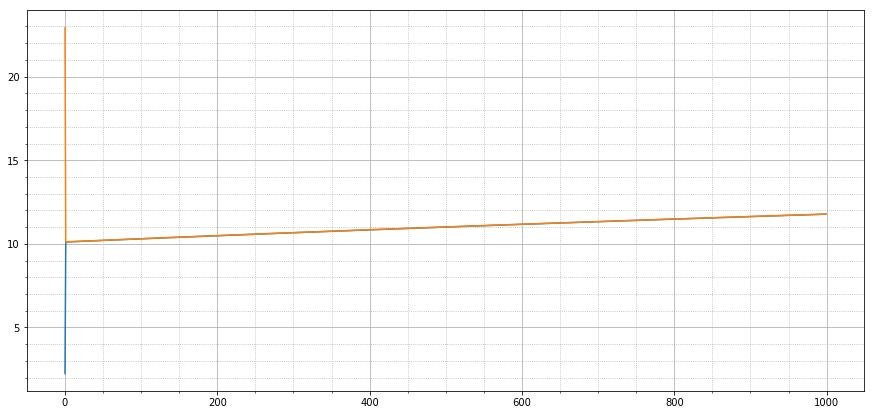

In [3]:
import numpy as np
from opt_project import task_2
from opt_project.methods.first_order_methods import simple_gd
from opt_project.stop_criterias import iteration_stop_crit

F = np.array([
    [-1, 1],
    [1, -1]
])
g = np.array([1, 1])
a = np.array([1, 1])
b = 1
c = np.array([1, 1])
d = 1

oracle = task_2.first_order_oracle()
constraints = task_2.constraints(F, g, a, b, c, d)
init_point = constraints.initialise()
criteria = iteration_stop_crit(1000)


gradient_descent_task = simple_gd(oracle, constraints)
gradient_descent_task.set_init_position(init_point)
gradient_descent_task.set_alpha(0.5)

result = gradient_descent_task.make(criteria)
result.Show()